Additional Liberaries used:
* Spacy (conda install -c conda-forge spacy)
* Additonal English Package in Spacy (conda install -c conda-forge spacy-model-en_core_web_lg)
* Gensim (conda install -c anaconda gensim)

In [1]:
import pandas as pd
import numpy as np
import spacy
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
nlp = spacy.load('en_core_web_lg')

In [3]:
df = pd.read_csv('data job posts.csv')

In [4]:
pd.set_option('max_columns', None)

In [5]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19001 entries, 0 to 19000
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   jobpost           19001 non-null  object
 1   date              19001 non-null  object
 2   Title             18973 non-null  object
 3   Company           18994 non-null  object
 4   AnnouncementCode  1208 non-null   object
 5   Term              7676 non-null   object
 6   Eligibility       4930 non-null   object
 7   Audience          640 non-null    object
 8   StartDate         9675 non-null   object
 9   Duration          10798 non-null  object
 10  Location          18969 non-null  object
 11  JobDescription    15109 non-null  object
 12  JobRequirment     16479 non-null  object
 13  RequiredQual      18517 non-null  object
 14  Salary            9622 non-null   object
 15  ApplicationP      18941 non-null  object
 16  OpeningDate       18295 non-null  object
 17  Deadline    

In [7]:
print(df['AboutC'][0])

nan


In [8]:
df[['date', 'OpeningDate']]

,date,OpeningDate
0,"Jan 5, 2004",NaN
1,"Jan 7, 2004",NaN
2,"Jan 7, 2004",NaN
3,"Jan 7, 2004",NaN
4,"Jan 10, 2004",NaN
...,...,...
18996,"Dec 28, 2015",29 December 2015
18997,"Dec 30, 2015",30 December 2015
18998,"Dec 30, 2015",30 December 2015
18999,"Dec 30, 2015",30 December 2015


## Job Postings by Year

Text(0.5, 0, 'Year')

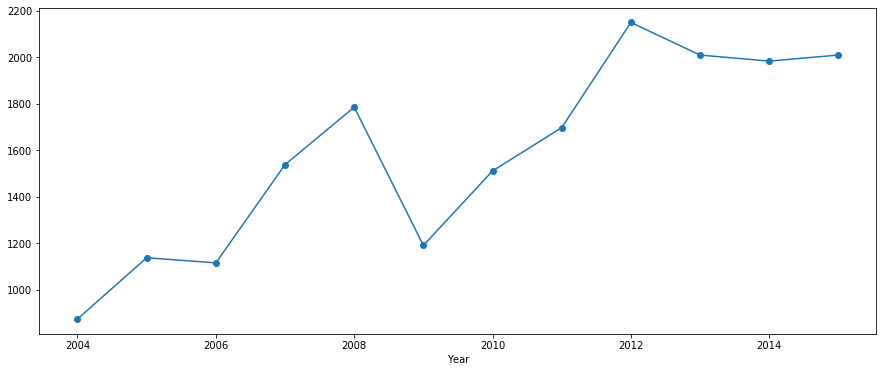

In [9]:
plt.figure(figsize=(15, 6))
plt.plot(df.groupby('Year')['jobpost'].count(), marker='o')
plt.xlabel('Year')

## Job postings by Month

Text(0.5, 0, 'Month')

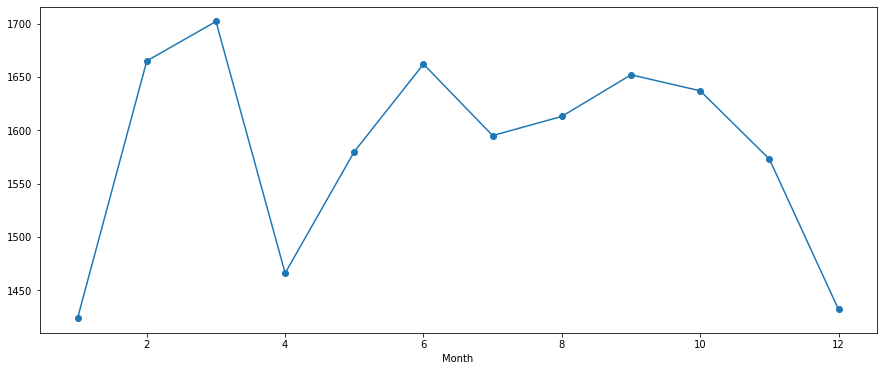

In [10]:
plt.figure(figsize=(15, 6))
plt.plot(df.groupby('Month')['jobpost'].count(), marker='o')
plt.xlabel('Month')

## Top 20 companies posting Jobs

In [11]:
pd.DataFrame(df['Company'].value_counts()).head(20)

,Company
ArmenTel CJSC,353
World Vision Armenia,239
Mentor Graphics Development Services CJSC,236
Career Center NGO,229
Orange Armenia,203
Ameriabank CJSC,196
Converse Bank CJSC,161
SAS Group LLC,150
UNDP Armenia Office,132
Central Bank of Armenia,126


## Length of Job Post for Each Entry

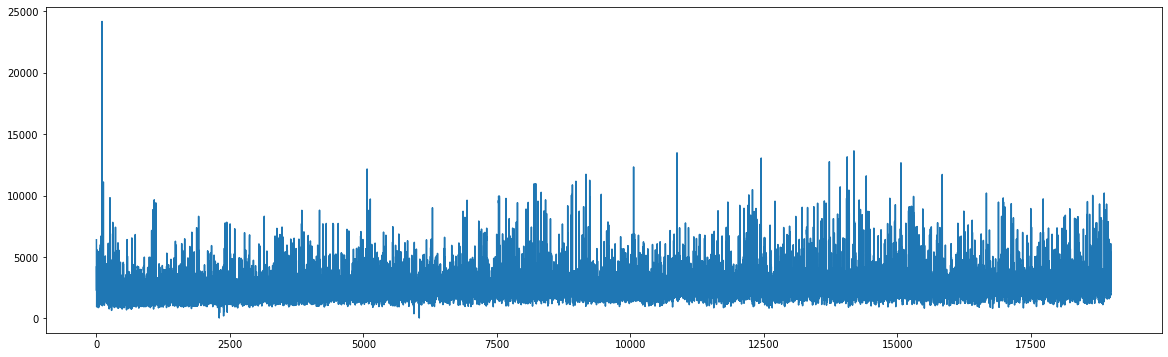

In [12]:
plt.figure(figsize=(20, 6))
plt.plot(df['jobpost'].str.len())

## Data Quality

### Duplicate Posts

In [13]:
len(df[df.duplicated(['jobpost', 'Title'])])

109

In [14]:
df.drop_duplicates(['jobpost', 'Title'], inplace=True)

In [15]:
len(df[df.duplicated(['jobpost', 'Title'])])

0

In [16]:
df.head()

,jobpost,date,Title,Company,AnnouncementCode,Term,Eligibility,Audience,StartDate,Duration,Location,JobDescription,JobRequirment,RequiredQual,Salary,ApplicationP,OpeningDate,Deadline,Notes,AboutC,Attach,Year,Month,IT
0,AMERIA Investment Consulting Company\nJOB TITL...,"Jan 5, 2004",Chief Financial Officer,AMERIA Investment Consulting Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",AMERIA Investment Consulting Company is seekin...,- Supervises financial management and administ...,"To perform this job successfully, an\nindividu...",NaN,"To apply for this position, please submit a\nc...",NaN,26 January 2004,NaN,NaN,NaN,2004,1,False
1,International Research & Exchanges Board (IREX...,"Jan 7, 2004",Full-time Community Connections Intern (paid i...,International Research & Exchanges Board (IREX),NaN,NaN,NaN,NaN,NaN,3 months,"IREX Armenia Main Office; Yerevan, Armenia \nD...",NaN,NaN,- Bachelor's Degree; Master's is preferred;\n-...,NaN,Please submit a cover letter and resume to:\nI...,NaN,12 January 2004,NaN,The International Research & Exchanges Board (...,NaN,2004,1,False
2,Caucasus Environmental NGO Network (CENN)\nJOB...,"Jan 7, 2004",Country Coordinator,Caucasus Environmental NGO Network (CENN),NaN,NaN,NaN,NaN,NaN,Renewable annual contract\nPOSITION,"Yerevan, Armenia",Public outreach and strengthening of a growing...,- Working with the Country Director to provide...,"- Degree in environmentally related field, or ...",NaN,Please send resume or CV toursula.kazarian@......,NaN,20 January 2004\nSTART DATE: February 2004,NaN,The Caucasus Environmental NGO Network is a\nn...,NaN,2004,1,False
3,Manoff Group\nJOB TITLE: BCC Specialist\nPOSI...,"Jan 7, 2004",BCC Specialist,Manoff Group,NaN,NaN,NaN,NaN,NaN,NaN,"Manila, Philippines",The LEAD (Local Enhancement and Development fo...,- Identify gaps in knowledge and overseeing in...,"- Advanced degree in public health, social sci...",NaN,Please send cover letter and resume to Amy\nPe...,NaN,23 January 2004\nSTART DATE: Immediate,NaN,NaN,NaN,2004,1,False
4,Yerevan Brandy Company\nJOB TITLE: Software D...,"Jan 10, 2004",Software Developer,Yerevan Brandy Company,NaN,NaN,NaN,NaN,NaN,NaN,"Yerevan, Armenia",NaN,- Rendering technical assistance to Database M...,- University degree; economical background is ...,NaN,Successful candidates should submit\n- CV; \n-...,NaN,"20 January 2004, 18:00",NaN,NaN,NaN,2004,1,True


In [17]:
df.shape

(18892, 24)

## Data Pre-Processing

### Removing Newlines and Single Quotes

In [18]:
df['jobpost'] = df['jobpost'].apply(lambda x: x.replace('\n', ' '))

In [19]:
df['jobpost'] = df['jobpost'].apply(lambda x: x.replace("'", ''))

### Removal of Emails, Web addresses and Telephone numbers

In [20]:
pattern_phone = r'\d+-\d+-\d+ | \d{6}'
pattern_email = r'[\w]+@[\w]+\.+[\w]+'
pattern_web = r'(?:(?:https?|ftp)://)?[\w\-?=%.]+\.[\w\-?=%.]+'

In [21]:
import re

In [22]:
re.findall(pattern_phone, df['jobpost'][0])

['374-1-546800 ', ' 524040', ' 524140']

### Many email addresses had the pattern '@...'. So I replaced them with '@gmail.com' for the ease in creating the regular expression pattern.

In [23]:
df['jobpost'] = df['jobpost'].apply(lambda x: x.replace('@...', '@gmail.com'))

### Removing all the phone numbers

In [24]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(pattern_phone, '', x))

### Removing all the Email Addresses

In [25]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(pattern_email, '', x))

### Removing all the Web Addresses

In [26]:
df['jobpost'] = df['jobpost'].apply(lambda x: re.sub(pattern_web, '', x))

In [27]:
df['jobpost'] = df['jobpost'].apply(lambda x: x.replace("/", ' '))

## Extending stop words

In [28]:
stop_add = ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities',
             'application', 'procedures', 'deadline', 'required', 'qualifications', 'renumeration', 
             'salary', 'date', 'company', 'llc']

In [29]:
for i in stop_add:
    nlp.Defaults.stop_words.add(i)
    nlp.vocab[i].is_stop = True

In [30]:
nlp.Defaults.stop_words

{"'d",
 "'ll",
 "'m",
 "'re",
 "'s",
 "'ve",
 'a',
 'about',
 'above',
 'across',
 'after',
 'afterwards',
 'again',
 'against',
 'all',
 'almost',
 'alone',
 'along',
 'already',
 'also',
 'although',
 'always',
 'am',
 'among',
 'amongst',
 'amount',
 'an',
 'and',
 'another',
 'any',
 'anyhow',
 'anyone',
 'anything',
 'anyway',
 'anywhere',
 'application',
 'are',
 'armenia',
 'armenian',
 'around',
 'as',
 'at',
 'back',
 'be',
 'became',
 'because',
 'become',
 'becomes',
 'becoming',
 'been',
 'before',
 'beforehand',
 'behind',
 'being',
 'below',
 'beside',
 'besides',
 'between',
 'beyond',
 'both',
 'bottom',
 'but',
 'by',
 'ca',
 'call',
 'can',
 'cannot',
 'company',
 'could',
 'date',
 'deadline',
 'did',
 'do',
 'does',
 'doing',
 'done',
 'down',
 'due',
 'during',
 'each',
 'eight',
 'either',
 'eleven',
 'else',
 'elsewhere',
 'empty',
 'enough',
 'even',
 'ever',
 'every',
 'everyone',
 'everything',
 'everywhere',
 'except',
 'few',
 'fifteen',
 'fifty',
 'first',


## Tokenization, Lemmatization, and Removal of Stop words and Punctuations

In [31]:
def token_freq(text):
    word_freq = {}
    for token in nlp(text):
        if (token.is_punct) | (nlp.vocab[token.text].is_stop) | (token.text.isspace()) | (token.text.isdigit()):
            continue
        else:
            if token.lemma_ not in word_freq.keys():
                word_freq[token.lemma_] = 1
            elif token.lemma_ in word_freq.keys():
                word_freq[token.lemma_] += 1
    return word_freq

In [32]:
def preprocessing(text):
    import string
    if text.isdigit() == False:
        text = text.lower()
        text = re.sub(r"[{}]".format(string.punctuation), " ", text)
        return text

In [33]:
df['Word Frequency'] = df['jobpost'].apply(token_freq)

In [34]:
df['Word Frequency'][0]

{'AMERIA': 2,
 'Investment': 3,
 'Consulting': 2,
 'Company': 2,
 'JOB': 2,
 'title': 1,
 'Chief': 2,
 'Financial': 2,
 'Officer': 2,
 'POSITION': 1,
 'LOCATION': 1,
 'Yerevan': 1,
 'Armenia': 1,
 'description': 1,
 'seek': 1,
 'manage': 4,
 'companys': 4,
 'fiscal': 3,
 'administrative': 7,
 'function': 3,
 'provide': 2,
 'highly': 2,
 'responsible': 1,
 'technically': 1,
 'complex': 2,
 'staff': 3,
 'assistance': 1,
 'Executive': 2,
 'Director': 1,
 'work': 5,
 'perform': 3,
 'require': 1,
 'high': 2,
 'level': 2,
 'technical': 2,
 'proficiency': 1,
 'financial': 15,
 'management': 17,
 'investment': 5,
 'supervisory': 2,
 'skill': 6,
 'job': 1,
 'responsibility': 1,
 'Supervises': 1,
 'include': 10,
 'assign': 2,
 'review': 1,
 'employee': 3,
 'process': 2,
 'product': 1,
 'counsel': 1,
 'give': 1,
 'performance': 2,
 'evaluation': 2,
 'recommend': 2,
 'disciplinary': 1,
 'action': 1,
 'serve': 2,
 'member': 1,
 'team': 4,
 'participate': 1,
 'strategic': 2,
 'operational': 1,
 'pla

# Jobposts Word Cloud which based on the Title 'Software Developer' (Single Row)

In [35]:
first_soft = df[df['Title'] == 'Software Developer']['Word Frequency'][4]

In [36]:
from PIL import Image
from wordcloud import WordCloud

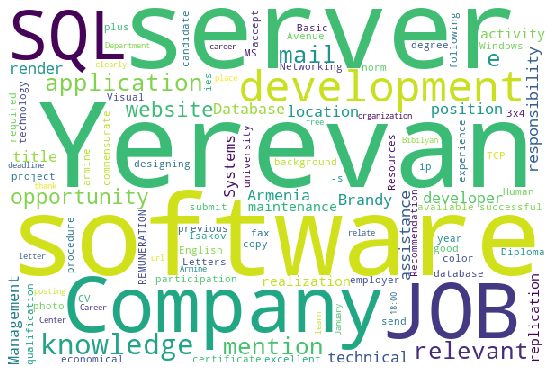

In [37]:
wc = WordCloud(background_color="white", width=600, height=400, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(first_soft)
plt.figure(figsize=(15,5))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc)

#### Saving the data till now in order to save time

In [38]:
# df.to_csv('data job posts updated.csv',index=False)

In [39]:
# df = pd.read_csv('data job posts updated.csv')

# Supervised Learning

## Selecting the Independent and Target variable in order to classify if a job posting is related to IT sector.

In [40]:
X = df['jobpost']
y = df['IT']

Text(0.5, 1.0, 'IT Job Class Distribution')

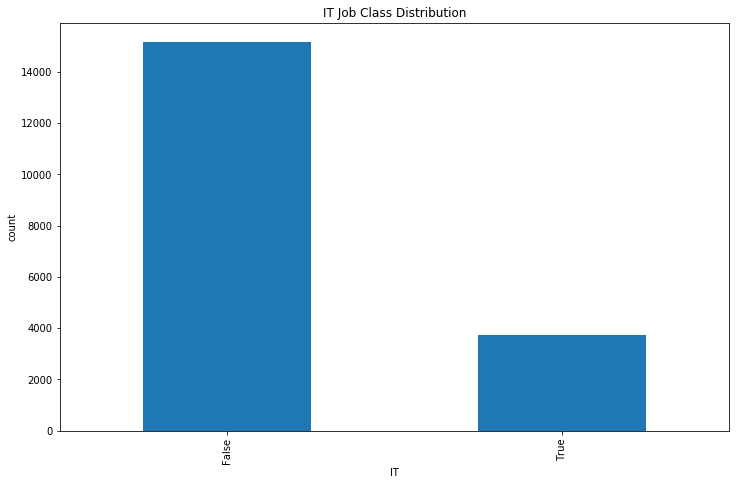

In [41]:
plt.figure(figsize=(12, 7.5))
df['IT'].value_counts().plot(kind='bar')
plt.xlabel('IT')
plt.ylabel('count')
plt.title('IT Job Class Distribution')

## Splitting the data into training and test sets

In [42]:
from sklearn.model_selection import train_test_split

In [43]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

# Building a Pipeline

In [44]:
from sklearn.pipeline import Pipeline

In [45]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [46]:
from sklearn.svm import LinearSVC

In [47]:
text_clf = Pipeline([('tfidf', TfidfVectorizer(preprocessor=preprocessing)), ('clf', LinearSVC())])

In [48]:
text_clf.fit(X_train, y_train)

Pipeline(memory=None,
         steps=[('tfidf',
                 TfidfVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.float64'>,
                                 encoding='utf-8', input='content',
                                 lowercase=True, max_df=1.0, max_features=None,
                                 min_df=1, ngram_range=(1, 1), norm='l2',
                                 preprocessor=<function preprocessing at 0x000001F8E1371EA0>,
                                 smooth_idf=True, stop_words=None,
                                 strip_accents=None, sublinear_tf=False,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=None, use_idf=True,
                                 vocabulary=None)),
                ('clf',
                 LinearSVC(C=1.0, class_weight=None, dual=True,
                           fit_intercept=

In [49]:
y_pred = text_clf.predict(X_test)

In [50]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [51]:
print(confusion_matrix(y_test, y_pred))

[[4893   94]
 [ 180 1068]]


In [52]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

       False       0.96      0.98      0.97      4987
        True       0.92      0.86      0.89      1248

    accuracy                           0.96      6235
   macro avg       0.94      0.92      0.93      6235
weighted avg       0.96      0.96      0.96      6235



In [53]:
print(accuracy_score(y_test, y_pred))

0.9560545308740979


## Side-by-Side comparison between the Actual and the Predicted Target Variable

In [54]:
df1 = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})

In [55]:
df1.sample(10)

,Actual,Predicted
3971,False,False
11790,False,False
6320,False,False
52,False,False
3854,False,False
18137,False,False
11229,False,False
6088,False,False
11157,False,False
6226,False,False


# Unsupervised Learning

## Pre-Processing the data

In [56]:
df['RequiredQual'].replace(np.nan, '', regex=True, inplace=True)

In [57]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: x.replace('\n', ' '))

In [58]:
(df[df['RequiredQual'] == '']['RequiredQual'])

7         
10        
11        
16        
26        
        ..
18683     
18700     
18794     
18868     
18946     
Name: RequiredQual, Length: 434, dtype: object

In [59]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: x.replace("'", ''))

In [60]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: x.replace('@...', '@gmail.com'))

In [61]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: re.sub(pattern_phone, '', x))

In [62]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: re.sub(pattern_email, '', x))

In [63]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: re.sub(pattern_web, '', x))

In [64]:
df['RequiredQual'] = df['RequiredQual'].apply(lambda x: x.replace("/", ' '))

## Clustering similar terms

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [66]:
from sklearn.cluster import KMeans

### Creating Tfidf vector of the column 'RequiredQual' since it's our point of interest

In [67]:
tfidf2 = TfidfVectorizer(max_df=0.7, min_df=3, stop_words=list(nlp.Defaults.stop_words), preprocessor=preprocessing)

In [68]:
tfidf2.fit(df['RequiredQual'])

C:\Users\Abhishek\Anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:385: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['ll', 've'] not in stop_words.
  'stop_words.' % sorted(inconsistent))


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2',
                preprocessor=<function preprocessing at 0x000001F8E1371EA0>,
                smooth_idf=True,
                stop_words=['up', 'last', '’ve', 'front', 'formerly', 'amount',
                            'why', 'somehow', 'itself', 'hereupon', 'made',
                            'n‘t', 'your', 'thereafter', 'beyond', 'various',
                            'n’t', 'four', 'it', 'cannot', 'someone', 'and',
                            'since', 'whenever', 'doing', '’s', 'when', 'not',
                            'twenty', 'her', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [69]:
tfid_qual = tfidf2.transform(df['RequiredQual'])

### Creating an object km of KMeans()

In [70]:
km = KMeans(n_clusters=7, random_state=42)

In [71]:
km.fit(tfid_qual)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=7, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=42, tol=0.0001, verbose=0)

In [72]:
predictions = km.predict(tfid_qual)

In [73]:
predictions

array([4, 2, 2, ..., 0, 0, 3])

## Checking the Silhouette Score

In [74]:
from sklearn.metrics import silhouette_score

In [75]:
score = silhouette_score(tfid_qual, predictions)

In [76]:
score

0.015084793870435225

### Sorting the clusters

In [77]:
order_centroids = km.cluster_centers_.argsort()[:, ::-1]

In [78]:
terms = tfidf2.get_feature_names()

In [79]:
# for i in range(7):
#     print(f'Cluster {i}:')
#     for ind in order_centroids[i, :10]:
#         print(f'{terms[ind]}')
#     print('\n')

In [80]:
clusters = []
for i in range(7):
    for ind in order_centroids[i, :10]:
        clusters.append((i, terms[ind]))

In [81]:
first_cluster = [x[1] for x in clusters if x[0] == 0]
second_cluster = [x[1] for x in clusters if x[0] == 1]
third_cluster = [x[1] for x in clusters if x[0] == 2]
fourth_cluster = [x[1] for x in clusters if x[0] == 3]
fifth_cluster = [x[1] for x in clusters if x[0] == 4]
sixth_cluster = [x[1] for x in clusters if x[0] == 5]
seventh_cluster = [x[1] for x in clusters if x[0] == 6]

In [82]:
all_cluster_terms = [first_cluster, second_cluster, third_cluster, fourth_cluster, fifth_cluster, sixth_cluster, seventh_cluster]

### Check all the terms in all the 7 clusters

In [83]:
for i, terms_cluster in enumerate(all_cluster_terms):
    print(f'Cluster {i+1}:')
    print('\n')
    print(terms_cluster)
    print('\n')

Cluster 1:


['ability', 'management', 'work', 'excellent', 'strong', 'degree', 'international', 'years', 'written', 'business']


Cluster 2:


['excellent', 'work', 'university', 'russian', 'languages', 'degree', 'ability', 'good', 'communication', 'ms']


Cluster 3:


['language', 'good', 'work', 'ability', 'degree', 'years', 'plus', 'languages', 'field', 'computer']


Cluster 4:


['higher', 'education', 'work', 'excellent', 'russian', 'languages', 'ability', 'good', 'computer', 'field']


Cluster 5:


['accounting', 'finance', 'tax', 'work', 'financial', 'standards', 'legislation', 'excellent', 'good', 'software']


Cluster 6:


['testing', 'development', 'software', 'programming', 'ability', 'design', 'good', 'linux', 'plus', 'test']


Cluster 7:


['sql', 'web', 'development', 'good', 'javascript', 'work', 'server', 'java', 'html', 'php']




In [84]:
' '.join(all_cluster_terms[0])

'ability management work excellent strong degree international years written business'

### Creating a df_clusters data frame

In [85]:
df_clusters = pd.DataFrame()

In [86]:
df_clusters['Cluster number'] = [1, 2, 3, 4, 5, 6, 7]

In [87]:
df_clusters['Terms'] = [' '.join(x) for x in all_cluster_terms]

### Mapping the interpreted cluster names to their numbers

In [88]:
cluster_map = {6: 'IT operations', 1: 'Project management', 3: 'Marketing and Sales', 5: 'Accounting and finance',
               2: 'Communication', 7: 'IT application development', 4: 'Higher education and language'}

In [89]:
df_clusters['Interpretation'] = df_clusters['Cluster number'].map(cluster_map)

## Interpretation of required qualification clusters over every job postings

In [90]:
df_clusters.style.set_properties(subset=['Terms'], **{'width': '300px'})

,Cluster number,Terms,Interpretation
0,1,ability management work excellent strong degree international years written business,Project management
1,2,excellent work university russian languages degree ability good communication ms,Communication
2,3,language good work ability degree years plus languages field computer,Marketing and Sales
3,4,higher education work excellent russian languages ability good computer field,Higher education and language
4,5,accounting finance tax work financial standards legislation excellent good software,Accounting and finance
5,6,testing development software programming ability design good linux plus test,IT operations
6,7,sql web development good javascript work server java html php,IT application development


# Named Entity Recognition

In [91]:
from spacy import displacy

In [92]:
import warnings
warnings.simplefilter('ignore')

### Randomly checking entities from text in 'RequiredQual'

In [93]:
for i in nlp(df['RequiredQual'][0][-498:]).sents:
    displacy.render(nlp(i.text), style='ent', jupyter=True)

In [94]:
len(df['RequiredQual'])

18892

### Creating a dictionary org_ents of unique words (entity = ORG) and their frequencies

In [95]:
org_ents = {}
# count = 0
for doc in df['RequiredQual']:
    if nlp(doc).ents:
        for ent in nlp(doc).ents:
            if ent.label_ == 'ORG':
                if ent.text not in org_ents.keys():
                    org_ents[ent.text] = 1
                elif ent.text in org_ents.keys():
                    org_ents[ent.text] += 1

## Word Cloud of Top ORG entities

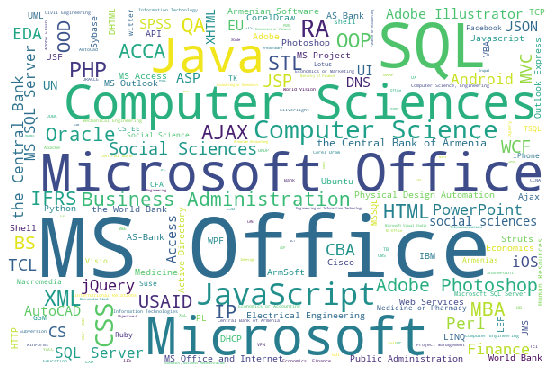

In [96]:
wc2 = WordCloud(background_color="white", width=600, height=400, relative_scaling=0.5, normalize_plurals=False).generate_from_frequencies(org_ents)
plt.figure(figsize=(15,5))
plt.axis("off")
plt.tight_layout(pad=0)
plt.imshow(wc2)

# Topic Modelling

### pos_filter() takes text as input and returns the text who's part-of-speech is either a noun or a verb

In [97]:
def pos_filter(text):
    lst = []
    for i in nlp(text):
        if (i.pos_ == 'NOUN') | (i.pos_ == 'VERB'):
            lst.append(i.text)
    return ' '.join(lst)

In [98]:
pos_verbnoun = df['RequiredQual'].apply(pos_filter)

In [99]:
tfidf3 = TfidfVectorizer(max_df=0.7, min_df=3, stop_words=list(nlp.Defaults.stop_words), preprocessor=preprocessing)

In [100]:
tfidf3.fit(pos_verbnoun)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=0.7, max_features=None,
                min_df=3, ngram_range=(1, 1), norm='l2',
                preprocessor=<function preprocessing at 0x000001F8E1371EA0>,
                smooth_idf=True,
                stop_words=['up', 'last', '’ve', 'front', 'formerly', 'amount',
                            'why', 'somehow', 'itself', 'hereupon', 'made',
                            'n‘t', 'your', 'thereafter', 'beyond', 'various',
                            'n’t', 'four', 'it', 'cannot', 'someone', 'and',
                            'since', 'whenever', 'doing', '’s', 'when', 'not',
                            'twenty', 'her', ...],
                strip_accents=None, sublinear_tf=False,
                token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
                vocabulary=None)

In [101]:
pos_verbnoun_tfidf = tfidf3.transform(pos_verbnoun)

## Non-Matrix Factorization

In [102]:
from sklearn.decomposition import NMF
nmf_model = NMF(n_components=7)

In [103]:
nmf_model.fit(pos_verbnoun_tfidf)

NMF(alpha=0.0, beta_loss='frobenius', init=None, l1_ratio=0.0, max_iter=200,
    n_components=7, random_state=None, shuffle=False, solver='cd', tol=0.0001,
    verbose=0)

In [104]:
for index, topic in enumerate(nmf_model.components_):
    print(f'THE TOP 12 WORDS FOR TOPIC {index}\n')
    print([tfidf3.get_feature_names()[i] for i in topic.argsort()[-12:]])
    print('\n')

THE TOP 12 WORDS FOR TOPIC 0

['problem', 'time', 'player', 'communication', 'deadlines', 'sense', 'responsibility', 'personality', 'team', 'pressure', 'work', 'ability']


THE TOP 12 WORDS FOR TOPIC 1

['understanding', 'applications', 'database', 'plus', 'testing', 'years', 'technologies', 'design', 'programming', 'web', 'software', 'development']


THE TOP 12 WORDS FOR TOPIC 2

['accountant', 'year', 'laws', 'regulations', 'years', 'standards', 'software', 'tax', 'finance', 'legislation', 'banking', 'accounting']


THE TOP 12 WORDS FOR TOPIC 3

['minimum', 'license', 'driving', 'year', 'communication', 'years', 'work', 'literacy', 'field', 'languages', 'computer', 'education']


THE TOP 12 WORDS FOR TOPIC 4

['marketing', 'sales', 'year', 'plus', 'communication', 'work', 'computer', 'years', 'languages', 'field', 'degree', 'university']


THE TOP 12 WORDS FOR TOPIC 5

['communication', 'projects', 'writing', 'proven', 'including', 'preferred', 'working', 'project', 'written', 'abili

In [105]:
pos_verbnoun_tfidf.shape

(18892, 4006)

In [106]:
df['RequiredQual'].shape

(18892,)

## Attaching discovered Topic Labels to the Original Article

In [107]:
topic_results = nmf_model.transform(pos_verbnoun_tfidf)

In [108]:
topic_results.argmax(axis=1)

array([2, 0, 4, ..., 5, 5, 0], dtype=int64)

In [109]:
df['Topic'] = topic_results.argmax(axis=1)

## Mapping the Topic numbers to their deduced Labels

In [110]:
map_topic = {0: 'Project Management and Development', 1: 'Software Development', 2: 'Banking and Finance',
             3: 'Education and Training', 4: 'Sales and Marketing', 5: 'Business Development and Management',
             6: 'Communication'}

In [111]:
df['Topic'] = df['Topic'].map(map_topic)

In [112]:
df[['Title', 'Topic']].sample(10)

,Title,Topic
12335,Food and Beverage Manager,Business Development and Management
7521,Senior Accountant,Banking and Finance
9283,Administration Officer,Banking and Finance
7110,Sales Trainer,Sales and Marketing
724,Guide,Communication
12091,Assets and Liabilities Management Unit Specialist,Banking and Finance
17964,Senior PHP Developer,Software Development
4375,Senior QA Engineer,Software Development
1074,Secretary,Education and Training
5983,Technical Writer,Communication


# Topic Frequencies

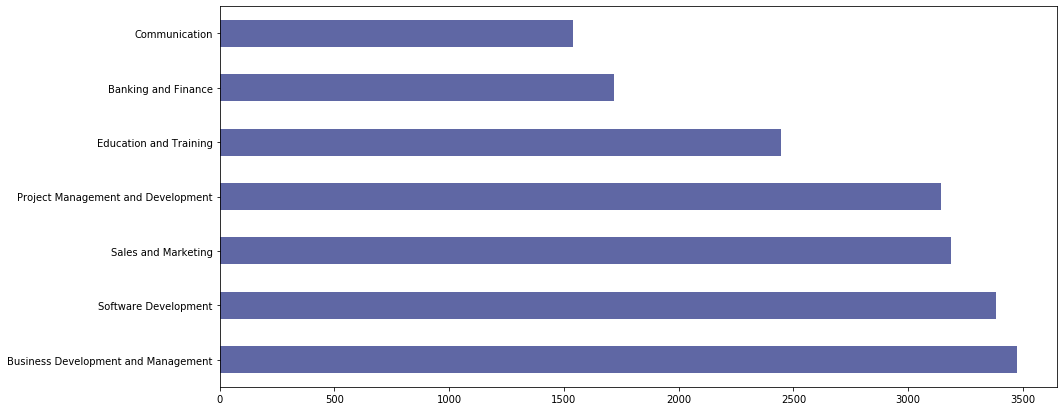

In [113]:
plt.figure(figsize=(15, 7))
df['Topic'].value_counts().plot(kind='barh', color='#5F67A4')

## Topic Frequencies 2004 - 2007

Text(0.5, 1.0, 'Topic Frequencies 2004 - 2007')

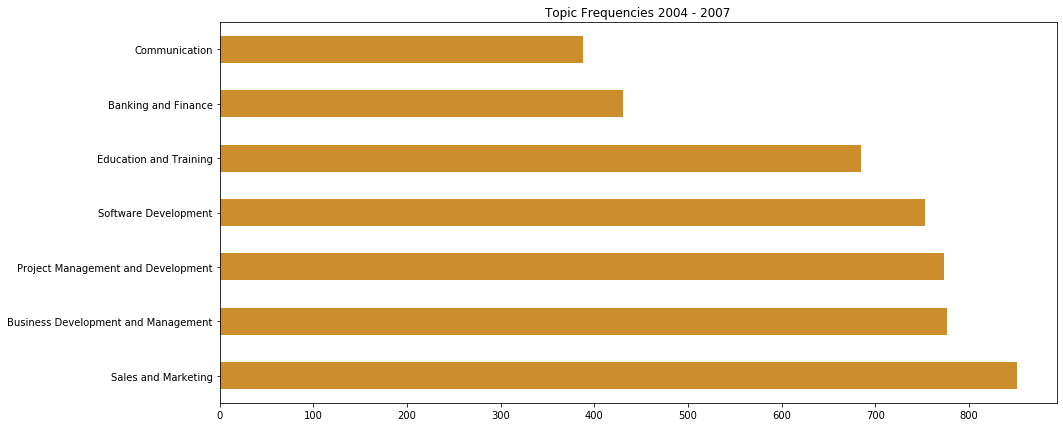

In [114]:
plt.figure(figsize=(15, 7))
df[(df['Year'] == 2004) | (df['Year'] == 2005) | (df['Year'] == 2006) | (df['Year'] == 2007)]['Topic'].value_counts().plot(kind='barh', color='#CC8D2D')
plt.title('Topic Frequencies 2004 - 2007')

## Topic Frequencies 2008 - 2011

Text(0.5, 1.0, 'Topic Frequencies 2008 - 2011')

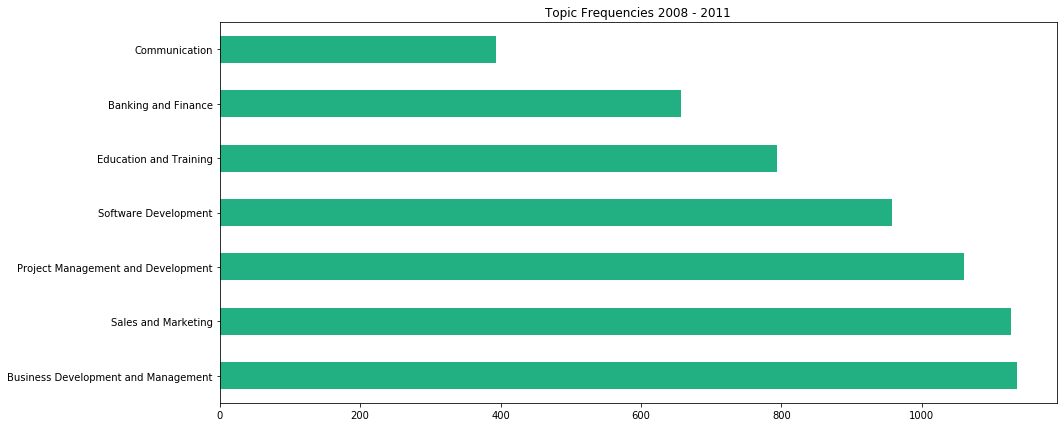

In [115]:
plt.figure(figsize=(15, 7))
df[(df['Year'] == 2008) | (df['Year'] == 2009) | (df['Year'] == 2010) | (df['Year'] == 2011)]['Topic'].value_counts().plot(kind='barh', color='#22AF81')
plt.title('Topic Frequencies 2008 - 2011')

## Topic Frequencies 2012 - 2015

Text(0.5, 1.0, 'Topic Frequencies 2012 - 2015')

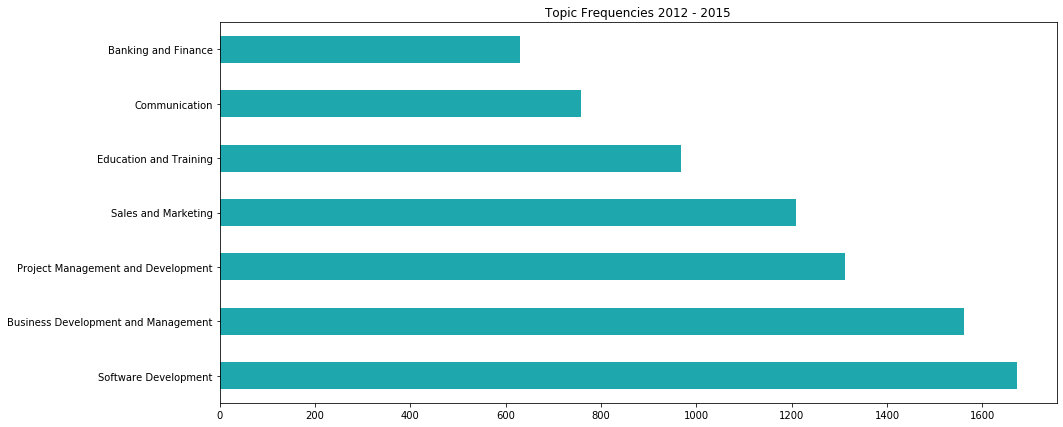

In [116]:
plt.figure(figsize=(15, 7))
df[(df['Year'] == 2012) | (df['Year'] == 2013) | (df['Year'] == 2014) | (df['Year'] == 2015)]['Topic'].value_counts().plot(kind='barh', color='#1FA7AE')
plt.title('Topic Frequencies 2012 - 2015')

# Information Extraction to Obtain Company Profiles

In [117]:
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

### Creating patterns for our Matcher

In [118]:
pattern1 = [{'POS': 'ADJ'}, {'ORTH': '-'}, {'POS': 'NOUN', 'OP': '+'}, {'LOWER': 'organization'}]
pattern2 = [{'POS': 'NOUN', 'OP': '+'}, {'LOWER': 'organization'}]
pattern3 = [{'POS': 'NOUN', 'OP': '+'}, {'LOWER': 'company'}]
pattern4 = [{'POS': 'NOUN', 'OP': '+'}, {'LOWER': 'services'}]
pattern5 = [{'LOWER': 'company'}, {'POS': 'VERB'}, {'POS': 'NOUN', 'OP': '+'}]
pattern6 = [{'LOWER': 'provider'}, {'POS': 'ADP'}, {'POS': 'NOUN', 'OP': '+'}, {'POS': 'CCONJ', 'OP': '+'}, {'POS': 'NOUN', 'OP': '+'}]
pattern7 = [{'LOWER': 'provider'}, {'POS': 'ADP'}, {'POS': 'NOUN', 'OP': '+'}]
pattern8 = [{'POS': 'VERB'}, {'POS': 'NOUN', 'OP': '+'}]
pattern9 = [{'POS': 'ADJ'}, {'POS': 'NOUN', 'OP': '+'}]
pattern10 = [{'POS': 'NOUN'}, {'POS': 'ADP'}, {'POS': 'NOUN', 'OP': '+'}]
pattern11 = [{'POS': 'NOUN'}, {'POS': 'NOUN', 'OP': '+'}]

In [119]:
matcher.add('CompanyProfiles', None, pattern1, pattern2, pattern3, pattern4, pattern5, pattern6, pattern7, pattern8, pattern9, pattern10, pattern11)

In [120]:
df['AboutC'].replace(np.nan, '', regex=True, inplace=True)

### match_freq is a dictionary that stores the unique phrases found by our matcher and count their frequency

In [121]:
match_freq = {}
for doc in df['AboutC']:
    found_matches = matcher(nlp(doc))
    for match_id, start, end in found_matches:
        span = nlp(doc)[start:end]
        if (nlp.vocab[span.text].is_stop) | (span.text.isspace()) | (span.text.isdigit()):
            continue
        else:
            if span.text not in match_freq.keys():
                match_freq[span.text] = 1
            elif span.text in match_freq.keys():
                match_freq[span.text] += 1

### Convert the match_freq to a list and sort it by their frequency  (values in match_freq)

In [122]:
match_freq_list = sorted(match_freq.items(), key = lambda kv:(kv[1], kv[0]), reverse=True)

In [123]:
companies = []
freq_comp = []
for i in match_freq_list[1:51]:
    companies.append(i[0])
    freq_comp.append(i[1])

## Top 50 Company profiles

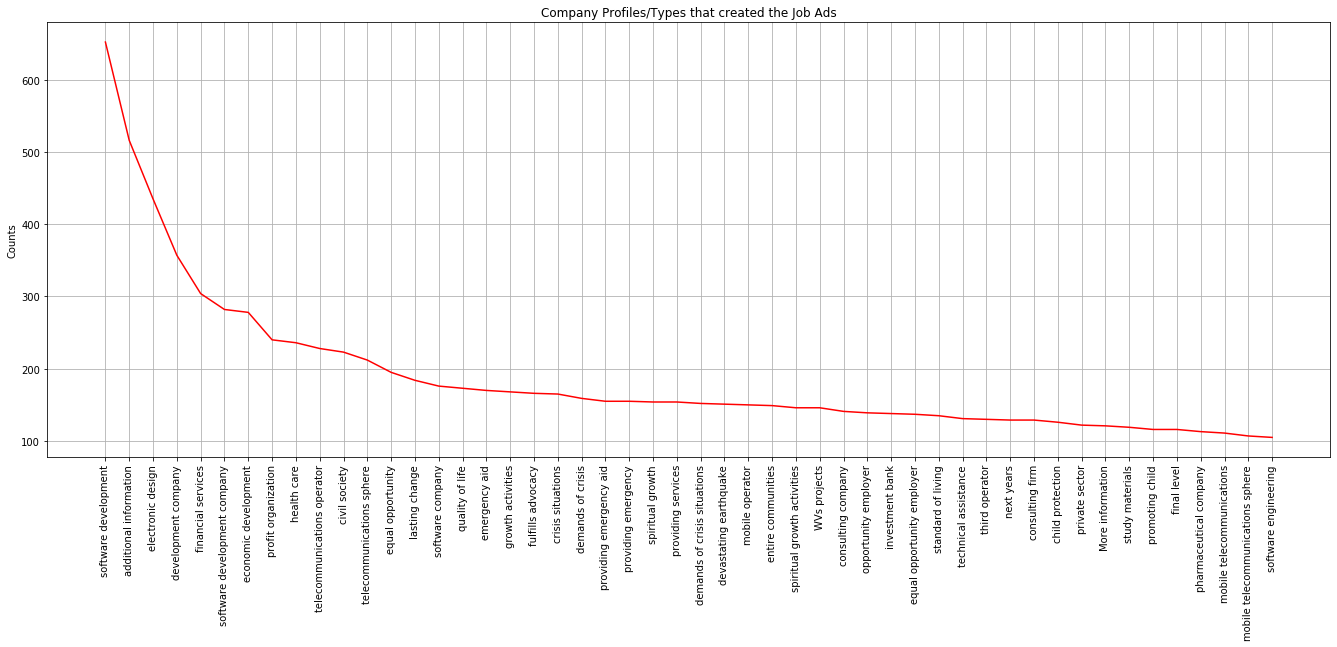

In [124]:
plt.figure(figsize=(23, 8))
plt.xticks(rotation='vertical')
plt.plot(companies, freq_comp, color='red')
plt.ylabel('Counts')
plt.title('Company Profiles/Types that created the Job Ads')
plt.grid()
plt.rcParams['axes.facecolor'] = '#E8E7E7'

# Job Similarity

### Using Custom Doc2Vec Embedding

## Pre-Processing the selected columns

### Replacing NaN values with an empy string

In [125]:
title = df['Title'].replace(np.nan, '', regex=True)
jd = df['JobDescription'].replace(np.nan, '', regex=True)
rq= df['RequiredQual'].replace(np.nan, '', regex=True)
jr = df['JobRequirment'].replace(np.nan, '', regex=True)

### Removing '\n'

In [126]:
title = title.apply(lambda x: x.replace('\n', ' '))
jd = jd.apply(lambda x: x.replace('\n', ' '))
rq = rq.apply(lambda x: x.replace('\n', ' '))
jr = jr.apply(lambda x: x.replace('\n', ' '))

### Removing " ' "

In [127]:
title = title.apply(lambda x: x.replace("'", ''))
jd = jd.apply(lambda x: x.replace("'", ''))
rq = rq.apply(lambda x: x.replace("'", ''))
jr = jr.apply(lambda x: x.replace("'", ''))

### Creating patterns to use in RegEx

In [128]:
pattern_phone = r'\d+-\d+-\d+ | \d{6}'
pattern_email = r'[\w]+@[\w]+\.+[\w]+'
pattern_web = r'(?:(?:https?|ftp)://)?[\w\-?=%.]+\.[\w\-?=%.]+'

In [129]:
title = title.apply(lambda x: x.replace('@...', '@gmail.com'))
jd = jd.apply(lambda x: x.replace('@...', '@gmail.com'))
rq = rq.apply(lambda x: x.replace('@...', '@gmail.com'))
jr = jr.apply(lambda x: x.replace('@...', '@gmail.com'))

### Removing phone numbers

In [130]:
title = title.apply(lambda x: re.sub(pattern_phone, '', x))
jd = jd.apply(lambda x: re.sub(pattern_phone, '', x))
rq = rq.apply(lambda x: re.sub(pattern_phone, '', x))
jr = jr.apply(lambda x: re.sub(pattern_phone, '', x))

### Removing Email Addresses

In [131]:
title = title.apply(lambda x: re.sub(pattern_email, '', x))
jd = jd.apply(lambda x: re.sub(pattern_email, '', x))
rq = rq.apply(lambda x: re.sub(pattern_email, '', x))
jr = jr.apply(lambda x: re.sub(pattern_email, '', x))

### Removing Web Addresses

In [132]:
title = title.apply(lambda x: re.sub(pattern_web, '', x))
jd = jd.apply(lambda x: re.sub(pattern_web, '', x))
rq = rq.apply(lambda x: re.sub(pattern_web, '', x))
jr = jr.apply(lambda x: re.sub(pattern_web, '', x))

### Removing ' / '

In [133]:
title = title.apply(lambda x: x.replace("/", ' '))
jd = jd.apply(lambda x: x.replace("/", ' '))
rq = rq.apply(lambda x: x.replace("/", ' '))
jr = jr.apply(lambda x: x.replace("/", ' '))

In [134]:
# stop_add = ['armenian', 'armenia', 'job', 'title', 'position', 'location', 'responsibilities',
#              'application', 'procedures', 'deadline', 'required', 'qualifications', 'renumeration', 
#              'salary', 'date', 'company', 'llc']

### tok_lem() takes a string document as input and returns the string without punctuations, stop words, digits.

In [135]:
def tok_lem(text):
    lst = []
    for token in nlp(text):
        if (token.is_punct) | (nlp.vocab[token.text].is_stop) | (token.text.isspace()) | (token.text.isdigit()):
            continue
        else:
            lst.append(token.lemma_.lower())
    return ' '.join(lst)

### Applying tok_lem() to all four variables

In [136]:
title = title.apply(tok_lem)
jd = jd.apply(tok_lem)
rq = rq.apply(tok_lem)
jr = jr.apply(tok_lem)

### Saving each string in a column in a list format in order to use them later 

In [137]:
title_split = title.apply(lambda x: x.split())
jd_split = jd.apply(lambda x: x.split())
jr_split = jr.apply(lambda x: x.split())
rq_split = rq.apply(lambda x: x.split())

### Checking the second row of jd_split

In [138]:
print(jd_split.iloc[2])

['public', 'outreach', 'strengthening', 'grow', 'network', 'environmental', 'ngos', 'business', 'international', 'organization', 'public', 'agency', 'serve', 'primary', 'contact', 'cenn', 'public', 'time']


## Finding silimarities and dissimilarities

In [141]:
job_dissimilarity_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

for job1_idx in range(3):  # rows
    for job2_idx in range(1000):

        doc1 = nlp(title.iloc[job1_idx])
        doc2 = nlp(title.iloc[job2_idx])
        title_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(jd.iloc[job1_idx])
        doc2 = nlp(jd.iloc[job2_idx])
        jd_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(jr.iloc[job1_idx])
        doc2 = nlp(jr.iloc[job2_idx])
        jr_similarity = doc1.similarity(doc2)
        
        doc1 = nlp(rq.iloc[job1_idx])
        doc2 = nlp(rq.iloc[job2_idx])
        rq_similarity = doc1.similarity(doc2)
        
        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_df = job_dissimilarity_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)

### Top 10 dissimilarity scores

In [142]:
job_dissimilarity_df.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
1,0.0,1.0,0.668175
2,0.0,2.0,0.221437
3,0.0,3.0,0.250697
4,0.0,4.0,0.481250
5,0.0,5.0,0.700567
6,0.0,6.0,0.332507
7,0.0,7.0,0.874520
8,0.0,8.0,0.377989
9,0.0,9.0,0.446577


## Creating a doc2vec model with gensim

In [143]:
import gensim
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

### We need to train the model's vocabulary that's why jobpost column is choses as it has all the info of the other four columns.

### We've taken IT column to use is as a tag to jobpost column

In [144]:
df_mod = pd.DataFrame()
df_mod['text'] = df['jobpost'].apply(gensim.utils.simple_preprocess)
df_mod["label"] = df['IT']

In [145]:
df_mod

,text,label
0,"[ameria, investment, consulting, company, job,...",False
1,"[international, research, exchanges, board, ir...",False
2,"[caucasus, environmental, ngo, network, cenn, ...",False
3,"[manoff, group, job, title, bcc, specialist, p...",False
4,"[yerevan, brandy, company, job, title, softwar...",True
...,...,...
18996,"[ngo, title, senior, creative, ux, ui, designe...",False
18997,"[coca, cola, hellenic, bottling, company, arme...",False
18998,"[coca, cola, hellenic, bottling, company, arme...",False
18999,"[san, lazzaro, llc, title, head, of, online, s...",False


### Splitting the data into train and test

In [146]:
train, test = train_test_split(df_mod, train_size=0.70, random_state=42, stratify=df_mod["label"])

### Let's see the train data

In [147]:
train.head()

,text,label
7890,"[agarak, copper, molybdenum, combine, cjsc, ti...",False
7113,"[andav, title, lawyer, legal, officer, start, ...",False
15157,"[american, councils, for, international, educa...",False
1460,"[center, for, agribusiness, rural, development...",False
4412,"[imex, group, co, ltd, yerevan, title, secreta...",False


### read_doc() reads and preprocesses the text data

In [148]:
def read_doc(df, tokens_only=False):
    for i, row in enumerate(df.iterrows()):
        if tokens_only:
            yield row[1]['text']
        else:
            # For training data, add tags
            yield TaggedDocument(row[1]['text'], [row[1]['label']])

In [149]:
train_doc = list(read_doc(train))

In [150]:
test_doc = list(read_doc(test, tokens_only=True))

In [151]:
train_doc[:1]

[TaggedDocument(words=['agarak', 'copper', 'molybdenum', 'combine', 'cjsc', 'title', 'mechanical', 'engineer', 'term', 'full', 'time', 'duration', 'long', 'term', 'with', 'month', 'probation', 'period', 'location', 'yerevan', 'armenia', 'job', 'description', 'agarak', 'copper', 'molybdenum', 'combine', 'cjsc', 'is', 'looking', 'for', 'qualified', 'mechanical', 'engineer', 'the', 'incumbent', 'is', 'directly', 'accountable', 'to', 'the', 'deputy', 'commercial', 'director', 'job', 'provide', 'technical', 'conclusion', 'about', 'the', 'ordered', 'spare', 'parts', 'coordinate', 'activities', 'with', 'other', 'work', 'units', 'or', 'departments', 'prepare', 'and', 'submit', 'reports', 'prepare', 'necessary', 'technical', 'documentation', 'required', 'qualifications', 'higher', 'education', 'in', 'the', 'relevant', 'field', 'years', 'of', 'work', 'experience', 'as', 'mechanical', 'engineer', 'good', 'knowledge', 'of', 'microsoft', 'office', 'tools', 'excel', 'word', 'and', 'internet', 'fluen

### Creating an object of Doc2Vec

In [152]:
model = Doc2Vec(vector_size=300, min_count=2, epochs=200)

### Training the model's vocabulary using pre-processed training data

In [153]:
model.build_vocab(train_doc)

In [154]:
# %time model.train(train_doc, total_examples=model.corpus_count, epochs=model.epochs)

### Let's save the model first, so it may be used again to find the similarity

In [155]:
model.save('doc2vec_train_model')

### Let's again load the model calling it 'd2v'

In [156]:
d2v = Doc2Vec.load('doc2vec_train_model')

### We're gonna be taking some raw information so let's replace all the NaN values with empty string on our original data.

In [157]:
df['Title'].replace(np.nan, '', regex=True, inplace=True)
df['JobDescription'].replace(np.nan, '', regex=True, inplace=True)
df['RequiredQual'].replace(np.nan, '', regex=True, inplace=True)
df['JobRequirment'].replace(np.nan, '', regex=True, inplace=True)

### Defining Cosine Similarity

In [158]:
from scipy import spatial

cosine_similarity = lambda x, y: 1 - spatial.distance.cosine(x, y)

## Similarity and Dissimilar scores using the simple averaging approach

In [159]:
job_dissimilarity_d2v_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

for job1_idx in range(3):  # rows
    for job2_idx in range(1000):
        title_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['Title'].split()), d2v.infer_vector(df.iloc[job2_idx]['Title'].split()))
        jd_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['JobDescription'].split()), d2v.infer_vector(df.iloc[job2_idx]['JobDescription'].split()))
        jr_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['JobRequirment'].split()), d2v.infer_vector(df.iloc[job2_idx]['JobRequirment'].split()))
        rq_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['RequiredQual'].split()), d2v.infer_vector(df.iloc[job2_idx]['RequiredQual'].split()))

        averaged_score = (title_similarity + jd_similarity + jr_similarity + rq_similarity) / 4.0
        job_dissimilarity_d2v_df = job_dissimilarity_d2v_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)
job_dissimilarity_d2v_df_sorted = job_dissimilarity_d2v_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_d2v_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
696,0.0,696.0,0.750730
322,0.0,322.0,0.916281
22,0.0,22.0,0.930970
596,0.0,596.0,0.931520
630,0.0,630.0,0.931563
464,0.0,464.0,0.934558
538,0.0,538.0,0.934833
331,0.0,331.0,0.937856
61,0.0,61.0,0.937858


### Top 10 jobs score

In [160]:
job_dissimilarity_d2v_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.000000
696,0.0,696.0,0.750730
322,0.0,322.0,0.916281
22,0.0,22.0,0.930970
596,0.0,596.0,0.931520
630,0.0,630.0,0.931563
464,0.0,464.0,0.934558
538,0.0,538.0,0.934833
331,0.0,331.0,0.937856
61,0.0,61.0,0.937858


### Show top 5 similar results to job - Chief Financial Officer

In [161]:
similar_jobs = job_dissimilarity_d2v_df_sorted.loc[job_dissimilarity_d2v_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df.iloc[int(job)])

jobpost             AMERIA Investment Consulting Company JOB TITLE...
date                                                      Jan 5, 2004
Title                                         Chief Financial Officer
Company                          AMERIA Investment Consulting Company
AnnouncementCode                                                  NaN
Term                                                              NaN
Eligibility                                                       NaN
Audience                                                          NaN
StartDate                                                         NaN
Duration                                                          NaN
Location                                             Yerevan, Armenia
JobDescription      AMERIA Investment Consulting Company is seekin...
JobRequirment       - Supervises financial management and administ...
RequiredQual        To perform this job successfully, an individua...
Salary              

### Show top 5 similar results to job - Intern

In [162]:
similar_jobs = job_dissimilarity_d2v_df_sorted.loc[job_dissimilarity_d2v_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df.iloc[int(job)])

jobpost             International Research & Exchanges Board (IREX...
date                                                      Jan 7, 2004
Title               Full-time Community Connections Intern (paid i...
Company               International Research & Exchanges Board (IREX)
AnnouncementCode                                                  NaN
Term                                                              NaN
Eligibility                                                       NaN
Audience                                                          NaN
StartDate                                                         NaN
Duration                                                     3 months
Location            IREX Armenia Main Office; Yerevan, Armenia \nD...
JobDescription                                                       
JobRequirment                                                        
RequiredQual        - Bachelors Degree; Masters is preferred; - Ex...
Salary              

### Show top 5 similar results to job - Country Coordinator

In [163]:
similar_jobs = job_dissimilarity_d2v_df_sorted.loc[job_dissimilarity_d2v_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df.iloc[int(job)])

jobpost             Caucasus Environmental NGO Network (CENN) JOB ...
date                                                      Jan 7, 2004
Title                                             Country Coordinator
Company                     Caucasus Environmental NGO Network (CENN)
AnnouncementCode                                                  NaN
Term                                                              NaN
Eligibility                                                       NaN
Audience                                                          NaN
StartDate                                                         NaN
Duration                          Renewable annual contract\nPOSITION
Location                                             Yerevan, Armenia
JobDescription      Public outreach and strengthening of a growing...
JobRequirment       - Working with the Country Director to provide...
RequiredQual        - Degree in environmentally related field, or ...
Salary              

## Similarity and Dissimilar scores using custom weighting approach

In [164]:
job_dissimilarity_d2v_df = pd.DataFrame(columns=['index', 'similar-job', 'dissimilar-score'])

for job1_idx in range(3):  # rows
    for job2_idx in range(1000):
        title_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['Title'].split()), d2v.infer_vector(df.iloc[job2_idx]['Title'].split()))
        jd_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['JobDescription'].split()), d2v.infer_vector(df.iloc[job2_idx]['JobDescription'].split()))
        jr_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['JobRequirment'].split()), d2v.infer_vector(df.iloc[job2_idx]['JobRequirment'].split()))
        rq_similarity = cosine_similarity(d2v.infer_vector(df.iloc[job1_idx]['RequiredQual'].split()), d2v.infer_vector(df.iloc[job2_idx]['RequiredQual'].split()))

        averaged_score = (title_similarity*0.9 + jd_similarity*0.3 + jr_similarity*0.3 + rq_similarity*0.3) / 4.0
        job_dissimilarity_d2v_df = job_dissimilarity_d2v_df.append({'index': job1_idx, 'similar-job': job2_idx, 'dissimilar-score': (1-averaged_score)},ignore_index=True)
job_dissimilarity_d2v_df_sorted = job_dissimilarity_d2v_df.sort_values(by=['index', 'dissimilar-score'], ascending=[True, True])
job_dissimilarity_d2v_df_sorted.head(10)

,index,similar-job,dissimilar-score
0,0.0,0.0,0.550000
696,0.0,696.0,0.775219
596,0.0,596.0,0.950219
538,0.0,538.0,0.954352
844,0.0,844.0,0.954554
331,0.0,331.0,0.957102
505,0.0,505.0,0.960344
322,0.0,322.0,0.961540
630,0.0,630.0,0.961618
22,0.0,22.0,0.962734


### Show top 5 similar results to job - Chief Financial Officer

In [165]:
similar_jobs = job_dissimilarity_d2v_df_sorted.loc[job_dissimilarity_d2v_df_sorted['index'] == 0].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df.iloc[int(job)])

jobpost             AMERIA Investment Consulting Company JOB TITLE...
date                                                      Jan 5, 2004
Title                                         Chief Financial Officer
Company                          AMERIA Investment Consulting Company
AnnouncementCode                                                  NaN
Term                                                              NaN
Eligibility                                                       NaN
Audience                                                          NaN
StartDate                                                         NaN
Duration                                                          NaN
Location                                             Yerevan, Armenia
JobDescription      AMERIA Investment Consulting Company is seekin...
JobRequirment       - Supervises financial management and administ...
RequiredQual        To perform this job successfully, an individua...
Salary              

### Show top 5 similar results to job - Intern

In [166]:
similar_jobs = job_dissimilarity_d2v_df_sorted.loc[job_dissimilarity_d2v_df_sorted['index'] == 1].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df.iloc[int(job)])

jobpost             International Research & Exchanges Board (IREX...
date                                                      Jan 7, 2004
Title               Full-time Community Connections Intern (paid i...
Company               International Research & Exchanges Board (IREX)
AnnouncementCode                                                  NaN
Term                                                              NaN
Eligibility                                                       NaN
Audience                                                          NaN
StartDate                                                         NaN
Duration                                                     3 months
Location            IREX Armenia Main Office; Yerevan, Armenia \nD...
JobDescription                                                       
JobRequirment                                                        
RequiredQual        - Bachelors Degree; Masters is preferred; - Ex...
Salary              

### Show top 5 similar results to job - Country Coordinator

In [167]:
similar_jobs = job_dissimilarity_d2v_df_sorted.loc[job_dissimilarity_d2v_df_sorted['index'] == 2].head(6)['similar-job'].tolist()

for job in similar_jobs:
    print(df.iloc[int(job)])

jobpost             Caucasus Environmental NGO Network (CENN) JOB ...
date                                                      Jan 7, 2004
Title                                             Country Coordinator
Company                     Caucasus Environmental NGO Network (CENN)
AnnouncementCode                                                  NaN
Term                                                              NaN
Eligibility                                                       NaN
Audience                                                          NaN
StartDate                                                         NaN
Duration                          Renewable annual contract\nPOSITION
Location                                             Yerevan, Armenia
JobDescription      Public outreach and strengthening of a growing...
JobRequirment       - Working with the Country Director to provide...
RequiredQual        - Degree in environmentally related field, or ...
Salary              